# HAT-P-18

In [1]:
import lightkurve as lk
from glob import glob
import ombre as om
import numpy as np
import matplotlib.pyplot as plt

In [2]:
name = 'HAT-P-18'

In [3]:
import lightkurve as lk
clc = lk.search_lightcurve(name, mission='TESS', author='SPOC').download_all().stitch().remove_nans().flatten(1001, sigma=3)

In [4]:
obs = om.Observation.from_MAST(name)

In [5]:
obs

HAT-P-18 [3 Visits]

<AxesSubplot:xlabel='Phase [JD]', ylabel='Normalized Flux'>

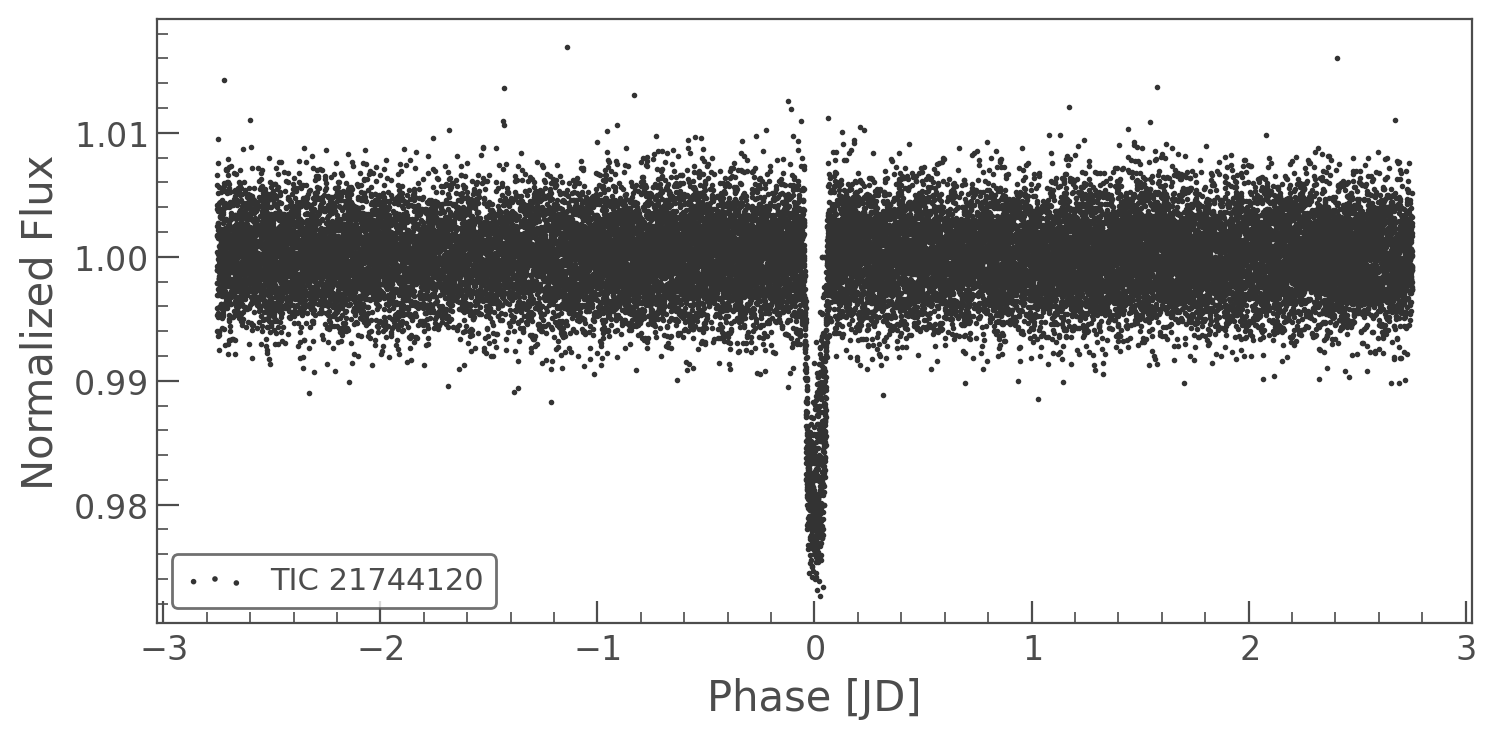

In [6]:
clc.fold(obs.period, obs.t0 - 2457000).scatter()

In [7]:
obs.fit_transit(x_suppl=clc.time.value + 2457000,
                y_suppl=clc.flux.value/np.median(clc.flux.value),
                yerr_suppl=clc.flux_err.value/np.median(clc.flux.value),
                exptime_suppl=np.median(np.diff(clc.time.value)))

<AxesSubplot:xlabel='Phase', ylabel='$e^-s^{-1}$'>

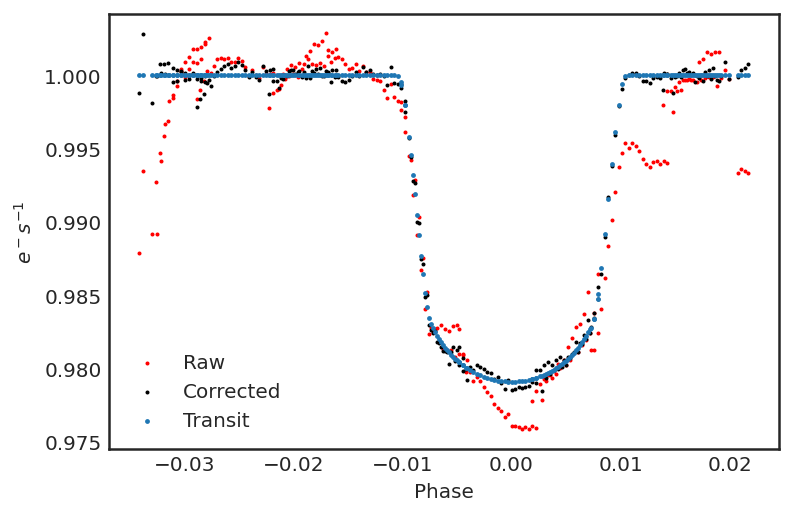

In [8]:
obs.plot()

In [9]:
obs.fit_model()

Fitting Transit/Eclipse Model:   0%|          | 0/3 [00:00<?, ?it/s]

Fitting Transit/Eclipse Model:  33%|███▎      | 1/3 [00:05<00:10,  5.35s/it]

Fitting Transit/Eclipse Model:  67%|██████▋   | 2/3 [00:11<00:05,  5.57s/it]

Fitting Transit/Eclipse Model: 100%|██████████| 3/3 [00:16<00:00,  5.59s/it]

Fitting Transit/Eclipse Model: 100%|██████████| 3/3 [00:16<00:00,  5.56s/it]

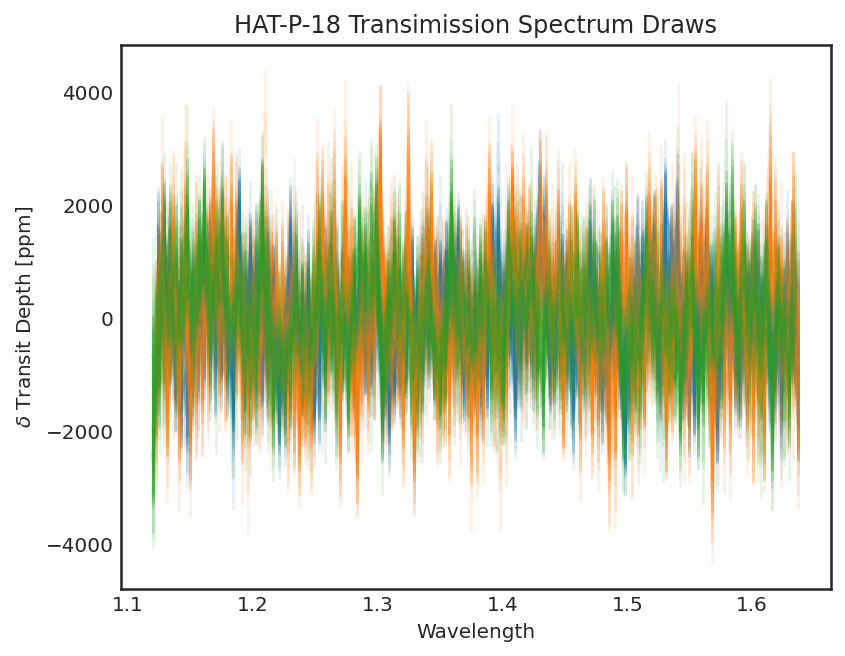

In [10]:
obs.plot_spectra()

<AxesSubplot:title={'center':'HAT-P-18 Transmission Spectrum, Visit: 1'}, xlabel='Wavelength', ylabel='$\\delta$ Transit Depth [ppm]'>

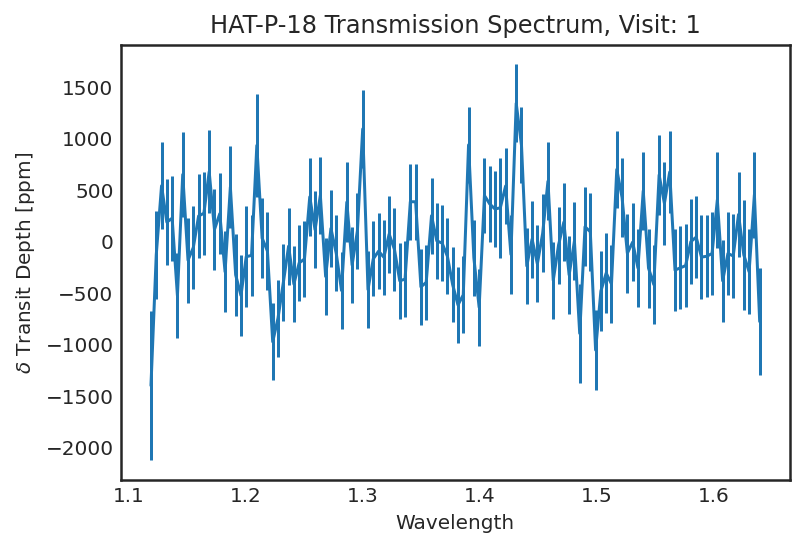

In [11]:
om.Spectra([visit.transmission_spectrum for visit in obs]).flatten().bin(bins=np.linspace(0.8, 1.7, 200)).plot()

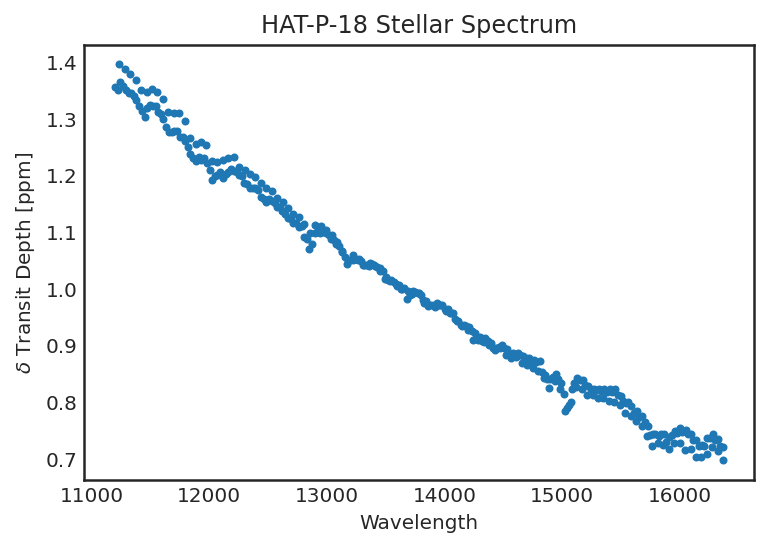

In [12]:
spec = obs.stellar_spectra
spec.plot(marker='.', ls='')
spec.hdulist.writeto(f'results/{name}_stellar_spectrum.fits', overwrite=True)

In [13]:
from astropy.io import fits
try:
    hdulist = om.Spectra([visit.transmission_spectrum for visit in obs if visit.transmission_spectrum.spec.sum() != 0]).hdulist
    hdulist.writeto(f'results/{name}_transmission.fits', overwrite=True)
except:
    pass
try:    
    hdulist = om.Spectra([visit.emission_spectrum for visit in obs if visit.emission_spectrum.spec.sum() != 0]).hdulist
    hdulist.writeto(f'results/{name}_emission.fits', overwrite=True)
except:
    pass

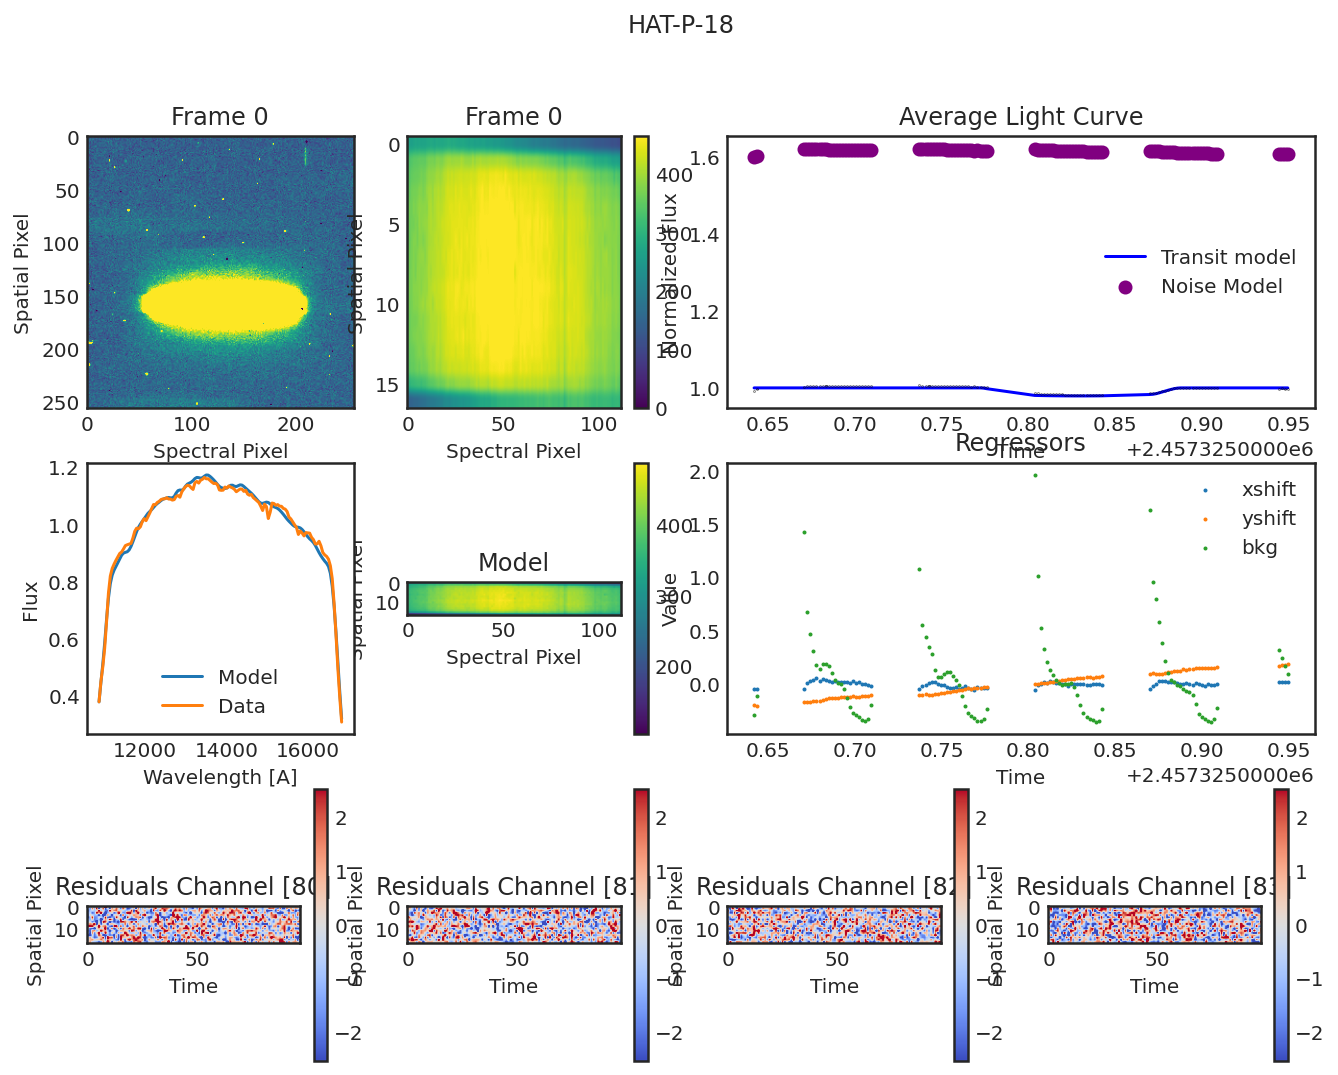

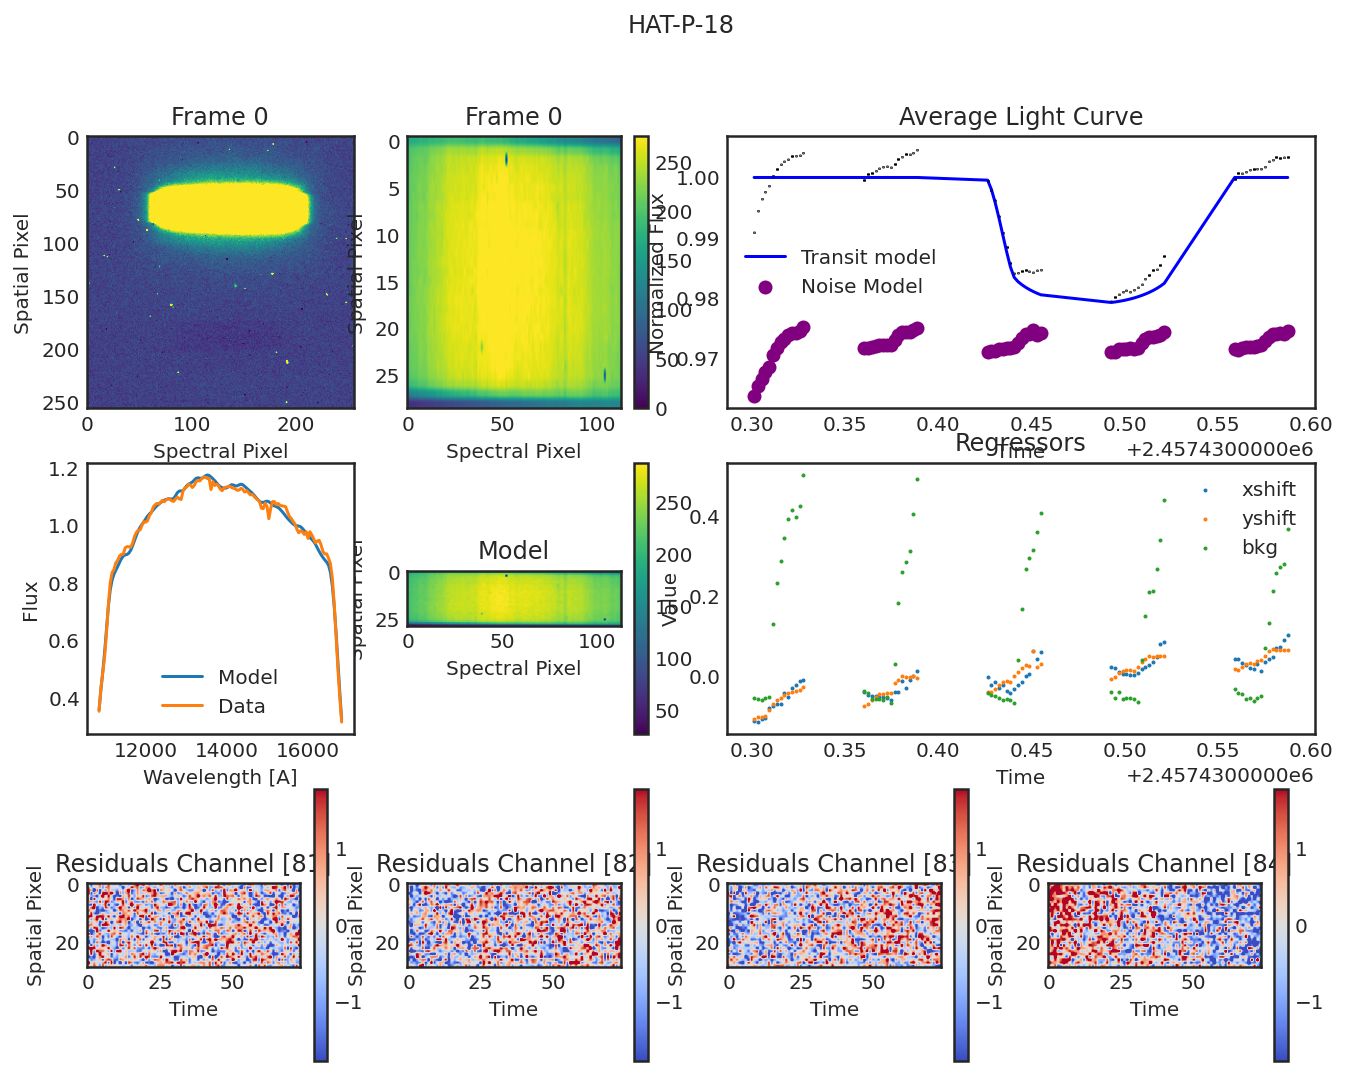

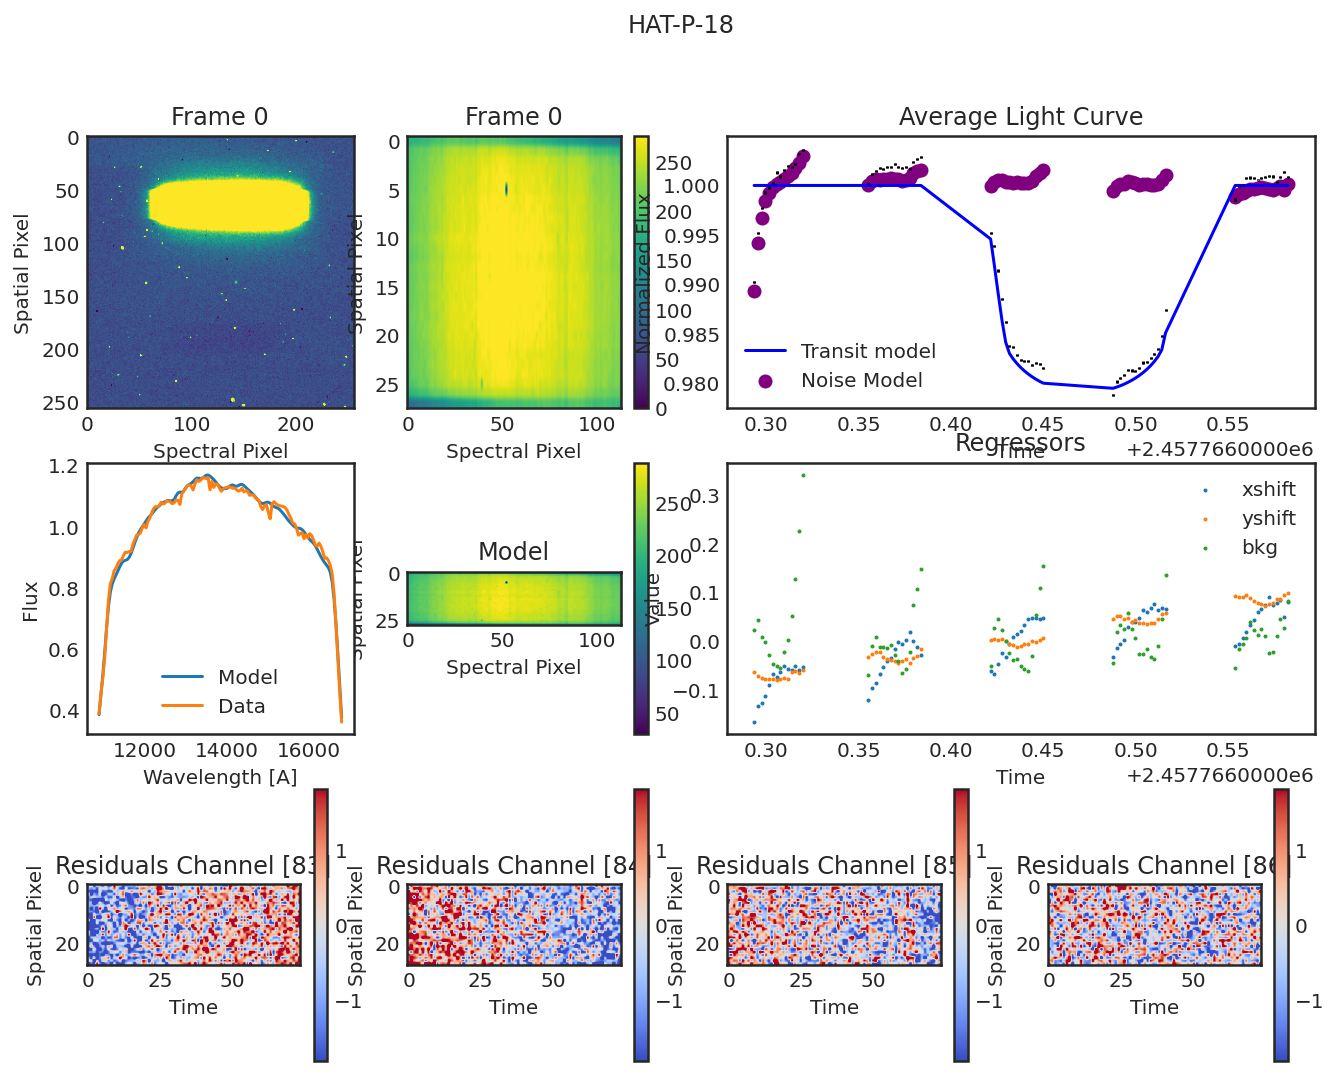

In [14]:
for visit in obs:
    visit.diagnose();
    plt.show();